In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
import tqdm
from datetime import datetime
from sklearn.model_selection import train_test_split
import traceback

In [612]:
filename = "data"
df = pd.read_csv(f'{filename}.txt', header = None, sep=", ", names=["x", 'y'], engine='python')
operators1 = ['+', '-', '*', '/', 'sin', 'cos', 'const', 'x']
operators2 = ['const', 'x']

num_evaluation = 500
depth = 8

x_s = df["x"].to_numpy()
y_s = df["y"].to_numpy()
y_s = [float(y) for y in y_s]

df.head()

,x,y
0,0.0299,1.0130
1,0.0329,1.0140
2,0.1084,1.0280
3,0.1411,1.0264
4,0.1535,1.0245


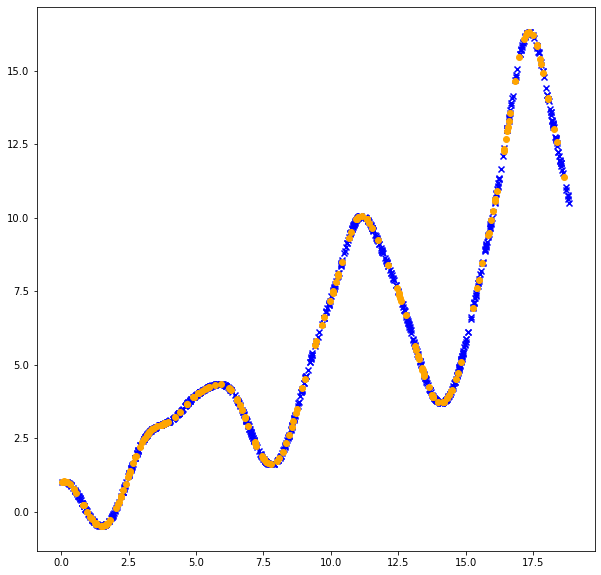

In [613]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.2)
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train,color='blue', marker='x');
plt.scatter(X_test, y_test,color='orange');

In [614]:
def find_all_children(arr):
    """
    random pick a parent node and return it in a list with ALL its children (children, grand-children)  
    """
    
    res = []
    ptr = 0
    n = random.randint(2*len(arr)//5, len(arr)//2) # len(arr)-1
    res.append(n)
    
    while res[ptr] <= len(arr)-1:
        if 2 * res[ptr] <= len(arr)-1:
            res.append(2*res[ptr])
        else: break
        if 2 * res[ptr] + 1 <= len(arr)-1:
            res.append(2*res[ptr]+1)
        else: break
            
        ptr += 1
    return res


def merge(dict1, dict2):
    """merge two dictionaries"""
    res = {**dict1, **dict2}
    return res

In [615]:
def random_generate(depth):
    """
    generate a sequence of binary heap
    INPUTS:
        depth: depth of the binary tree -> int
    
    OUTPUT:
        binary heap
    """
    
    max_length = 2 ** depth - 1
    
    length = random.randint(1, max_length)
    first_half = length//2
    second_half = length - first_half
    
    res = ['nah']
    
    for i in range(1, first_half):
        pick = random.choice(operators1)
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators1)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    for i in range(first_half, length):
        
        pick = random.choices(population=operators2, weights=(0.5, 0.5))[0]
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators2)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    return res

In [616]:
def mutate(binary_heap, mutate_rate):
    
    binaryheap = copy.deepcopy(binary_heap)
    
    ele = int(len(binaryheap) * mutate_rate)
    
    for i in range(ele):
        ptr = random.randint(1, len(binaryheap)-1)

        if ptr < len(binaryheap)//2:
            pick = random.choice(operators1)

            if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
                tmp = copy.deepcopy(operators1)
                tmp.remove(binaryheap[ptr-1])
                pick = random.choice(tmp)       

        else:
            pick = random.choice(operators2)

            if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
                tmp = copy.deepcopy(operators2)
                tmp.remove(binaryheap[ptr-1])
                pick = random.choice(tmp)

        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
        
        binaryheap[ptr] = pick

    return binaryheap

In [617]:
a = random_generate(depth=4)
a

['nah', 'sin', 'x', 9.1448, 4.5798]

In [622]:
mutate(a, 0.5)

['nah', 'sin', 'x', 2.5086, 4.5798]

In [545]:
def evaluate_binary_heap(binary_heap, x):
    
    """
    Evaluate binary from back to front
    
    """
    
    bh = copy.deepcopy(binary_heap)
    for i in range(len(bh)-1, 0, -1):
        try:
            if bh[i] == 'x':
                bh[i] = x

            elif bh[i] == '+':

                bh[i] = bh[2*i] + bh[2*i+1]

            elif bh[i] == '-':

                bh[i] = bh[2*i] - bh[2*i+1]

            elif bh[i] == '*':

                bh[i] = bh[2*i] * bh[2*i+1]

            elif bh[i] == '/':

                bh[i] = bh[2*i] / bh[2*i+1]

            elif bh[i] == 'sin':

                bh[i] = np.sin(bh[2*i])

            elif bh[i] == 'cos':

                bh[i] = np.cos(bh[2*i])
        except:
#             return random.random()
            return 10
#             pass
#             print(f"Math invalid")
#             print(binary_heap)
            
    return bh[1]

In [623]:
def calculate_y(x_s, equation):
    calculated_y = []
    for ele in x_s:
        res = evaluate_binary_heap(equation, x=ele)
        calculated_y.append(res)
    return calculated_y

In [624]:
a = random_generate(depth=4)
b = random_generate(depth=4)
print(f"a = {a}")
print(f"b = {b}")

print(f"evaluate a: {evaluate_binary_heap(a, x=2)}")
print(f"evaluate a: {evaluate_binary_heap(b, x=2)}")
crossover(a,b)

a = ['nah', 'cos', 'sin', '*', 9.126, 'x', 'x', 'x', 7.247]
b = ['nah', 9.1503, 'x', 'cos', '*', 'sin', 0.4718, 0.8341, 5.0675, 5.8459, 1.4653, 'x', 'x']
evaluate a: 0.9569901877745313
evaluate a: 9.1503


[['nah', 'cos', 'sin', 'sin', 9.126, 'x', 1.4653, 'x', 7.247],
 ['nah',
  9.1503,
  'x',
  'cos',
  '*',
  '*',
  0.4718,
  0.8341,
  5.0675,
  5.8459,
  'x',
  'x',
  'x']]

In [501]:

equ = ['nah', "+", 'x', 3]
x = [1,2,3,4,5]
calculate_y(x, equ)

[4, 5, 6, 7, 8]

In [502]:
def calculate_mse(y, y_hat):
    """
    use np to calculate mse
    """
#     calculated_y = np.array(calculate_y(x_s, equation=equation))
#     calculated_y = [x.astype(float) for x in calculated_y] # cast to np.float
#     y = [n.astype(float) for n in y]
#     y_hat = [n.astype(float) for n in y_hat]
#     print(len(y) == len(y_hat))
    y = np.array(y)
    y_hat = np.array(y_hat)
    mse = np.square(np.subtract(y, y_hat)).mean()
    return mse  

In [503]:
def calc_mse(y, y_hat):
    """
    home-made mse calculation
    """
    errors_sq = []
    tmp = 0
    for i in range(len(y)):
        try:
            e = (y[i] - y_hat[i]) ** 2
            tmp = e
        except TypeError:
#             print(f"y[i] = {y[i]}")
#             print(f"y_hat[i] = {y_hat[i]}")
            pass
        errors_sq.append(tmp)
    return round(sum(errors_sq)/len(errors_sq), 8)

In [504]:
a = [45,46,34,63,75]
b = [21,64,23,64,23]
print(calc_mse(a,b))

745.2


In [505]:
def generate_population(population, depth):
    """
    generate some number of population
    """
    pool = {}
    
    for i in range(population):
        equation = random_generate(depth)
        y_calculated = calculate_y(x_s, equation=equation)
        mse = calc_mse(y_calculated, y_s)
        
        pool[mse] = equation
    
    return pool

In [564]:
def crossover(parent1, parent2):
    """
    crossover operation
    1. random pick a point at parent1
    2. random pick a point at parent2
    3. completely swap the points and their children
    4. return two trees
    """
    
    p1 = copy.deepcopy(parent1)
    p2 = copy.deepcopy(parent2)
    
    rm_idxs1 = find_all_children(p1) # top node and its grand-grandchildren - random
    rm_idxs2 = find_all_children(p2) # top node and its grand-grandchildren - random
    
#     print(rm_idxs1)
#     print(rm_idxs2)
    
    removed1 = [p1[x] for x in rm_idxs1] 
    removed2 = [p2[x] for x in rm_idxs2]
    
    for idx in rm_idxs1:
        p1[idx] = 'nah'
    
    for idx in rm_idxs2:
        p2[idx] = 'nah' 
        
        
    # if they are in the same length
    if len(removed1) == len(removed2):
        for ele in removed1:
            for i in range(1, len(p2)):
                if p2[i] == "nah":
                    p2[i] = ele
                    break
                    
        for ele in removed2:
            for i in range(1, len(p1)):
                if p1[i] == "nah":
                    p1[i] = ele
                    break
    
    # if not
    elif len(removed1) > len(removed2):

        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed1):
            while ptr_idx < len(rm_idxs2): 
                p2[rm_idxs2[ptr_idx]] = removed1[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1
                
            p2.append(removed1[ptr_rm])
            ptr_rm += 1
            
        for ele in removed2:
            for idx in rm_idxs1:
                p1[idx] = ele
                break                   
    else:
        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed2):
            while ptr_idx < len(rm_idxs1): 
                p1[rm_idxs1[ptr_idx]] = removed2[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1

            p1.append(removed2[ptr_rm])
            ptr_rm += 1
            
        for ele in removed1:
            for idx in rm_idxs2:
                p2[idx] = ele
                break        

         
    for i in range(1, len(p1)):
        if p1[i] == 'nah':
#             p1[i] = 'x'
            p1[i] = round(random.random() * 10 + 0.1, 4) # not the best
    for i in range(1, len(p2)):
        if p2[i] == 'nah':
#             p2[i] = 'x'
            p2[i] = round(random.random() * 10 + 0.1, 4) # not the best
                
    child1 = p1
    child2 = p2
        
    return [child1, child2]


In [680]:
def mutate_pool(pool: dict, mutate_rate: float)-> dict:
    """
    mutate a pool of population by given mutation rate
    """
    copied_pool = copy.deepcopy(pool)
    
    new_pool = {}
    
    number = int(len(copied_pool) * mutate_rate)
    
    for i in range(number):
        keys = list(copied_pool.keys())
        random.shuffle(keys)
        mutant = mutate(copied_pool[keys[0]], mutate_rate=1)
        y_hat = calculate_y(x_s, equation=mutant)
        mse = calc_mse(y_s, y_hat)
        new_pool[mse] = mutant
    pool = merge(new_pool, copied_pool)
    return pool

In [683]:
a = generate_population(population=2, depth=3)
a

{47.30040498: ['nah', 'cos', 7.6215, 'x'], 35.89597814: ['nah', 9.8145, 'x']}

In [706]:
mutate_pool(pool=a, mutate_rate=1)

{26.61122884: ['nah', 2.7311, 4.5912, 2.7683],
 35.89597814: ['nah', 9.8145, 'x'],
 47.30040498: ['nah', 'cos', 7.6215, 'x']}

In [633]:
a = ['nah',1,2,3,4,5,6,7,8,9]
b = ['nah','a', 'b', 'c', 'd', 'e', 'f', 'g']

crossover(a,b)

[['nah', 1, 2, 3, 'c', 5, 6, 7, 'f', 'g'],
 ['nah', 'a', 'b', 4, 'd', 'e', 8, 9]]

In [508]:
def random_search(num, x_s, y_s, depth):
    
    """
    random search
    """
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    for i in range(num):
        
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")

        calculated_y = []
        
        equation = random_generate(depth=depth)
        
        for ele in x_s:
            res = evaluate_binary_heap(equation, x=ele)
            calculated_y.append(res)
            
        calculated_y = np.array(calculated_y)
        try:
            mse = (np.square(y_s - calculated_y)).mean(axis=0)
        except:
            print("raise MSE error")
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
    return [evaluation, error, final_equation, y_calculated]

In [589]:
def random_mutation_hill_climber(num, x_s, y_s, depth):
    """
    random hill climber
    """
    
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    
    first_gen = random_generate(depth=depth)
    y_cal = calculate_y(x_s=x_s, equation=first_gen)
    mse = calculate_mse(y_s, y_cal)
    
    for i in range(0, num):
        
        mutant = mutate(first_gen, mutate_rate=0.01)
        calculated_y = calculate_y(x_s, equation=mutant)
        mse = calculate_mse(calculated_y, y_s)
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y

        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y
            
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")
    
    return [evaluation, error, final_equation, y_calculated]

In [590]:
def random_restart_hill_climber(num_eval, x_s, y_s, depth, num_tries):
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    counter = num_eval
    
    while counter > 0:
        
        first_gen = random_generate(depth=depth)
        y_cal = calculate_y(x_s=x_s, equation=first_gen)
        mse = calculate_mse(y_s, y_cal)
        
        if (num_eval - counter) % 100 == 0:
            print(f"{(num_eval - counter)/num_evaluation*100} % complete")
        
        counter -= 1
    
        if len(errors) == 0:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
        
        while num_tries > 0 and counter > 0:
            
            mutant = mutate(first_gen, mutate_rate=0.01)
            calculated_y = calculate_y(x_s, equation=mutant)
            new_mse = calculate_mse(calculated_y, y_s)
            
            if (num_eval - counter) % 100 == 0:
                print(num_eval - counter)
            
            if new_mse < errors[-1]:
                errors.append(new_mse)
                evaluations.append(num_eval - counter)
                final_equation = mutant
                y_calculated = calculate_y(x_s, mutant)
            else:
                num_tries -= 1
        
        if mse < errors[-1]:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
            
    return [evaluations, errors, final_equation, y_calculated]

In [548]:
def evol_algo(num_eval, x_s, y_s, depth, init_pop):
    """
    selection 50%
    mutation are built-in to crossover
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)
    #             children_pool[calculate_mse(y_s, y_hat_kid1)] = kid1
    #             children_pool[calculate_mse(y_s, y_hat_kid2)] = kid2

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")

            merge_pool = merge(children_pool, pool)
            print(f"merged pool = {len(merge_pool)}")

            pool = merge_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:9*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [569]:
def evol_algo_div(num_eval, x_s, y_s, depth, init_pop):
    """
    selection 50%
    mutation are built-in to crossover
    adding some random diversity
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")
            
            merge_pool = merge(children_pool, pool)
            print(f"merged pool = {len(merge_pool)}")
            
            pool = merge_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:5*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            if num_keys < init_pop:
                new_pool = generate_population(depth=depth, population=(init_pop - num_keys)//2)
                temp_pool = merge(temp_pool, new_pool)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [709]:
def evol_algo_div_mut(num_eval, x_s, y_s, depth, init_pop, mutate_rate):
    """
    selection 50%
    mutation are built-in to crossover
    adding some random diversity
    adding mutation in the pool
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 
#             keys = list(pool.keys())
            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")
            
            merge_pool = merge(children_pool, pool)
            
            mutated_pool = mutate_pool(pool=merge_pool, mutate_rate=mutate_rate)
#             print(f"merged pool = {len(merge_pool)}")
            
            pool = mutated_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:5*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            if num_keys < init_pop:
                new_pool = generate_population(depth=depth, population=(init_pop - num_keys)//2)
                temp_pool = merge(temp_pool, new_pool)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [710]:
res_ea_div_mut = evol_algo_div_mut(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=depth, init_pop=20, mutate_rate=0.5)


pool = 19
children pool = 18
# of keys = 10
top pool = 15
lowest error = 20.80245448
counter = 1
children pool = 14
# of keys = 10
top pool = 14
lowest error = 17.76673942
counter = 2
children pool = 14
# of keys = 10
top pool = 14
lowest error = 17.76673942
counter = 3
children pool = 14


<ipython-input-545-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]


# of keys = 10
top pool = 15
lowest error = 17.76673942
counter = 4
children pool = 14
# of keys = 10
top pool = 15
lowest error = 17.76673942
counter = 5
children pool = 14


<ipython-input-545-f83ed01f3e61>:32: RuntimeWarning: invalid value encountered in sin
  bh[i] = np.sin(bh[2*i])


# of keys = 10
top pool = 15
lowest error = 17.76673942
counter = 6
children pool = 14
# of keys = 10
top pool = 14
lowest error = 17.76673942
counter = 7
children pool = 14
# of keys = 10
top pool = 13
lowest error = 17.76673942
counter = 8
children pool = 12
# of keys = 5
top pool = 12
lowest error = 17.76673942
counter = 9
children pool = 12
# of keys = 5
top pool = 12
lowest error = 17.76673942
counter = 10
children pool = 12
# of keys = 5
top pool = 12
lowest error = 17.76673942
counter = 11
children pool = 12
# of keys = 10
top pool = 15
lowest error = 17.76673942
counter = 12
children pool = 14
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 13
children pool = 13
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 14
children pool = 14
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 15
children pool = 14


<ipython-input-545-f83ed01f3e61>:36: RuntimeWarning: invalid value encountered in cos
  bh[i] = np.cos(bh[2*i])


# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 16
children pool = 14
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 17
children pool = 13
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 18
children pool = 13
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 19
children pool = 14
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 20
children pool = 13
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 21
children pool = 13
# of keys = 10
top pool = 15
lowest error = 15.33062319
counter = 22
children pool = 14
# of keys = 15
top pool = 17
lowest error = 15.33062319
counter = 23
children pool = 16
# of keys = 15
top pool = 17
lowest error = 12.41419175
counter = 24
children pool = 16
# of keys = 15
top pool = 17
lowest error = 12.41419175
counter = 25
children pool = 16
# of keys = 15
top pool = 17
lowest error = 12.41419175
counter = 26
children pool = 16
# of keys = 15
top pool = 17
low

children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 110
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 111
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 112
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 113
children pool = 15
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 114
children pool = 15
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 115
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 116
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 117
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 118
children pool = 15
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 119
children pool = 15
# of keys = 15
top pool = 17
lowest error = 2.13968334
counter = 120
children pool = 15
# of keys = 1

# of keys = 10
top pool = 12
lowest error = 2.06850097
counter = 203
children pool = 12
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 204
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 205
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 206
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 207
children pool = 13
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 208
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 209
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 210
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 211
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 212
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 213
children pool = 14
# of keys = 10
top pool = 15
low

children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.06850097
counter = 297
children pool = 16
# of keys = 15
top pool = 17
lowest error = 2.06850097
counter = 298
children pool = 16
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 299
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 300
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 301
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 302
children pool = 14
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 303
children pool = 14
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 304
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 305
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 306
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 307
children pool = 14
# of keys = 1

# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 390
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 391
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 392
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 393
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 394
children pool = 14
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 395
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 396
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 397
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 398
children pool = 13
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 399
children pool = 14
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 400
children pool = 14
# of keys = 10
top pool = 15
low

children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 484
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 485
children pool = 12
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 486
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 487
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 488
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 489
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 490
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 491
children pool = 14
# of keys = 10
top pool = 14
lowest error = 2.06850097
counter = 492
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 493
children pool = 14
# of keys = 10
top pool = 15
lowest error = 2.06850097
counter = 494
children pool = 14
# of keys = 1

In [604]:
res_ea_div = evol_algo_div(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=depth, init_pop=50)
res_ea_div

<ipython-input-545-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]
<ipython-input-545-f83ed01f3e61>:36: RuntimeWarning: invalid value encountered in cos
  bh[i] = np.cos(bh[2*i])


pool = 39
children pool = 38
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 9.84212633
counter = 1
children pool = 36
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 9.84212633
counter = 2
children pool = 34
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 9.84212633
counter = 3
children pool = 34
merged pool = 37
# of keys = 15
top pool = 31
lowest error = 9.84212633
counter = 4
children pool = 30
merged pool = 37
# of keys = 15
top pool = 32
lowest error = 9.84212633
counter = 5
children pool = 31
merged pool = 35
# of keys = 15
top pool = 29
lowest error = 8.38491503
counter = 6
children pool = 27
merged pool = 37
# of keys = 15
top pool = 30
lowest error = 8.38491503
counter = 7
children pool = 30
merged pool = 35
# of keys = 15
top pool = 28
lowest error = 8.38491503
counter = 8
children pool = 28
merged pool = 33
# of keys = 15
top pool = 32
lowest error = 8.38491503
counter = 9
children pool = 32
merged pool = 37
# of keys = 15
top pool = 3

children pool = 31
merged pool = 42
# of keys = 20
top pool = 34
lowest error = 5.2075386
counter = 80
children pool = 34
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 81
children pool = 34
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 82
children pool = 34
merged pool = 47
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 83
children pool = 34
merged pool = 47
# of keys = 20
top pool = 34
lowest error = 5.2075386
counter = 84
children pool = 34
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 85
children pool = 34
merged pool = 44
# of keys = 20
top pool = 33
lowest error = 5.2075386
counter = 86
children pool = 32
merged pool = 42
# of keys = 20
top pool = 33
lowest error = 5.2075386
counter = 87
children pool = 32
merged pool = 48
# of keys = 20
top pool = 35
lowest error = 5.2075386
counter = 88
children pool = 34
merged pool = 47
# of keys = 20
top pool = 33
lowest e

children pool = 32
merged pool = 48
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 159
children pool = 33
merged pool = 49
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 160
children pool = 33
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 4.67106674
counter = 161
children pool = 35
merged pool = 50
# of keys = 25
top pool = 35
lowest error = 4.67106674
counter = 162
children pool = 32
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 163
children pool = 34
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 164
children pool = 34
merged pool = 50
# of keys = 25
top pool = 37
lowest error = 4.67106674
counter = 165
children pool = 32
merged pool = 46
# of keys = 20
top pool = 33
lowest error = 4.67106674
counter = 166
children pool = 30
merged pool = 45
# of keys = 20
top pool = 33
lowest error = 4.67106674
counter = 167
children pool = 32
merged pool = 44
# of keys = 20
top 

# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 237
children pool = 31
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 238
children pool = 34
merged pool = 45
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 239
children pool = 33
merged pool = 48
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 240
children pool = 32
merged pool = 46
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 241
children pool = 33
merged pool = 50
# of keys = 25
top pool = 36
lowest error = 4.67106674
counter = 242
children pool = 34
merged pool = 48
# of keys = 20
top pool = 31
lowest error = 4.67106674
counter = 243
children pool = 30
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.67106674
counter = 244
children pool = 33
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.67106674
counter = 245
children pool = 33
merged pool = 50
# of keys = 25
top pool = 36
lowest error = 4.67106674


children pool = 31
merged pool = 41
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 316
children pool = 30
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 317
children pool = 33
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 318
children pool = 34
merged pool = 43
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 319
children pool = 32
merged pool = 43
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 320
children pool = 32
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 321
children pool = 33
merged pool = 40
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 322
children pool = 34
merged pool = 47
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 323
children pool = 31
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 324
children pool = 33
merged pool = 44
# of keys = 20
top 

<ipython-input-545-f83ed01f3e61>:32: RuntimeWarning: invalid value encountered in sin
  bh[i] = np.sin(bh[2*i])


# of keys = 15
top pool = 28
lowest error = 4.66435889
counter = 380
children pool = 28
merged pool = 35
# of keys = 15
top pool = 32
lowest error = 4.66435889
counter = 381
children pool = 32
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 382
children pool = 34
merged pool = 48
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 383
children pool = 33
merged pool = 41
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 384
children pool = 34
merged pool = 44
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 385
children pool = 34
merged pool = 43
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 386
children pool = 30
merged pool = 45
# of keys = 20
top pool = 31
lowest error = 4.66435889
counter = 387
children pool = 30
merged pool = 38
# of keys = 15
top pool = 31
lowest error = 4.66435889
counter = 388
children pool = 30
merged pool = 39
# of keys = 15
top pool = 30
lowest error = 4.66435889


children pool = 34
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 459
children pool = 34
merged pool = 49
# of keys = 20
top pool = 33
lowest error = 4.66435889
counter = 460
children pool = 30
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 461
children pool = 31
merged pool = 46
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 462
children pool = 33
merged pool = 45
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 463
children pool = 32
merged pool = 40
# of keys = 20
top pool = 34
lowest error = 4.66435889
counter = 464
children pool = 33
merged pool = 43
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 465
children pool = 32
merged pool = 44
# of keys = 20
top pool = 35
lowest error = 4.66435889
counter = 466
children pool = 30
merged pool = 45
# of keys = 20
top pool = 32
lowest error = 4.66435889
counter = 467
children pool = 29
merged pool = 42
# of keys = 20
top 

[[0, 5, 12, 34, 40, 45, 69, 135, 145, 148, 257, 305],
 [9.84212633,
  8.38491503,
  7.48284749,
  7.43773959,
  7.43244515,
  7.22898052,
  5.2075386,
  4.86078044,
  4.74962981,
  4.67106674,
  4.66828653,
  4.66435889],
 ['nah',
  '-',
  '+',
  '-',
  '/',
  'cos',
  'sin',
  2.537,
  '-',
  '+',
  'x',
  'sin',
  '+',
  '/',
  '*',
  '/',
  '+',
  4.8283,
  'sin',
  4.3754,
  '/',
  'x',
  7.886,
  8.9441,
  'x',
  'x',
  5.4657,
  3.9342,
  0.2183,
  9.3477,
  'x',
  'x',
  'x',
  'x',
  6.3617,
  7.6069,
  'x',
  'x',
  2.6652,
  2.2837,
  'x',
  2.5347,
  'x'],
 [2.3943414240636454,
  2.390356427144729,
  2.2874958558565464,
  2.2419346020049655,
  2.2245870949674895,
  2.1401394517420256,
  2.138469597996312,
  2.12929538506342,
  2.118615634870831,
  2.0644886545370382,
  2.052547379933735,
  2.0231213867168556,
  2.002577762745127,
  1.996005890897103,
  1.9476789047869136,
  1.9352312468535535,
  1.9246569492891812,
  1.8361578059539396,
  1.8116440710569732,
  1.776089322704

In [595]:
res_rrhc = random_restart_hill_climber(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=8, num_tries=10)

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


<ipython-input-545-f83ed01f3e61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  bh[i] = bh[2*i] / bh[2*i+1]


In [596]:
res_rmhc = random_mutation_hill_climber(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


In [597]:
res_rs = random_search(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


In [ ]:
print(len(res_ea[0]))
print(len(res_ea[1]))
print(len(res_ea[2]))
print(len(res_ea[3]))

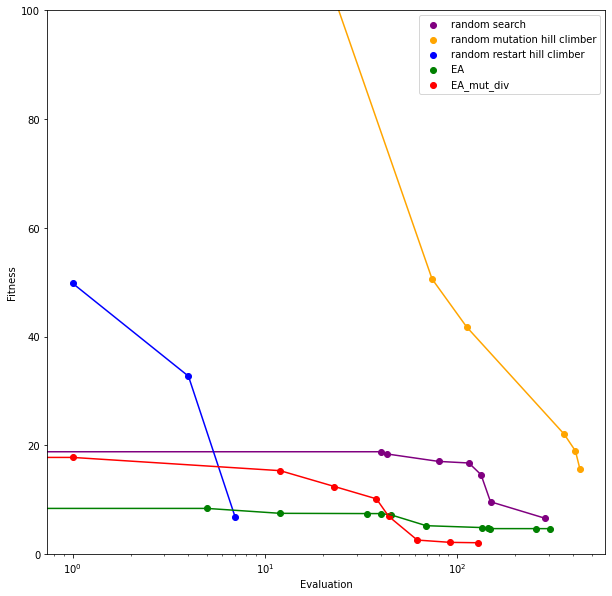

In [713]:
plt.figure(figsize=(10,10))
plt.scatter(res_rs[0], res_rs[1], color='purple', label='random search')
plt.plot(res_rs[0], res_rs[1], color='purple')

plt.scatter(res_rmhc[0], res_rmhc[1], color='orange', label='random mutation hill climber')
plt.plot(res_rmhc[0], res_rmhc[1], color='orange')

plt.scatter(res_rrhc[0], res_rrhc[1], color='blue', label='random restart hill climber')
plt.plot(res_rrhc[0], res_rrhc[1], color='blue')

plt.scatter(res_ea[0], res_ea[1], color='green', label='EA')
plt.plot(res_ea[0], res_ea[1], color='green')

plt.scatter(res_ea_div_mut[0], res_ea_div_mut[1], color='red', label='EA_mut_div')
plt.plot(res_ea_div_mut[0], res_ea_div_mut[1], color='red')

plt.legend()

plt.ylim(0, 100)
plt.xscale('log')
plt.ylabel("Fitness")
plt.xlabel("Evaluation");

In [ ]:
res_rrhc[2]

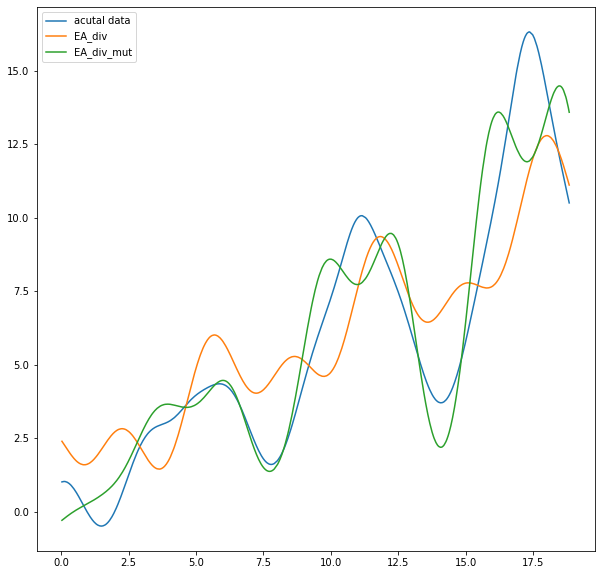

In [714]:
plt.figure(figsize=(10,10))
plt.plot(x_s, y_s, label="acutal data");
# plt.plot(x_s, res_rs[3], label="random search");
# plt.plot(x_s, res_rrhc[3], label="random restart HC");
# plt.plot(x_s, res_rmhc[3], label="random mutation HC");
plt.plot(x_s, res_ea[3], label="EA_div");
plt.plot(x_s, res_ea_div_mut[3], label="EA_div_mut");
plt.legend()

In [609]:
def save_data(result, title):
    today = datetime.now()
    d = today.strftime("%Y-%m-%d-%H-%M")
    path = "/Users/dxx0511a/Desktop/Columbia/MECS_4510_EA/hw2/output/" 
    
    df_plot = pd.DataFrame(data={'evaluation': result[0], 'mse': result[1]})
    df_graph = pd.DataFrame(data={"y_cal": result[3]})
    
    with open(f"{path}{d}_{title}_e{num_evaluation}_final_equation.txt",'w') as e:
            for ele in result[2]:
                e.write(str(ele))
                e.write('\n')
                

    df_plot.to_csv(f"{path}{d}_{title}_e{num_evaluation}_plot.csv", index=False)
    df_graph.to_csv(f"{path}{d}_{title}_e{num_evaluation}_graph.csv", index=False)


In [610]:
# save_data(res_rs,title="rs")
# save_data(res_rmhc,title="rmhc")
# save_data(res_rrhc,title="rrhc")
save_data(res_ea,title="ea_div")

In [ ]:
arr = [1,2,3,4]
def dummy(arr):
    for i in range(len(arr)):
        arr.remove(arr[i])
    return arr
dummy(arr)

In [ ]:
a =[1,2,3,4,5,6]
b = ['a','b']
i = 0
while i < len(a):
    for ele in b:
        print (ele)
    i += 1